In [1]:
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
adata = sc.read_10x_mtx('/Users/koheisanno/Documents/School/COS521_Final/droplet/Spleen-10X_P4_7/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols (stored within the .mtx file along w/ the UMIs) for the variable names (variables-axis index)
    
    cache=True)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [34]:
adata.shape

(3415, 12906)

In [3]:
# proprocessing: filter out genes expressed in less than 3 cells and cells expressing less than 200 genes
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

adata.var['mt'] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True) 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_ol

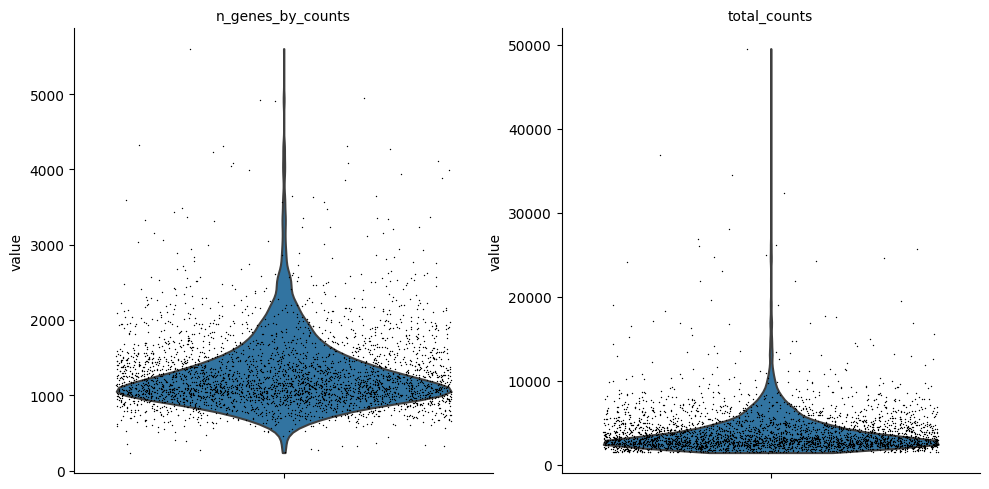

In [4]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'],
             jitter=0.4, multi_panel=True)

In [5]:
print(f'Before filtering: {adata.X.shape}')

adata = adata[adata.obs.n_genes_by_counts < 6000, :]
adata = adata[adata.obs.n_genes_by_counts > 600, :]
print(f'After filtering: {adata.X.shape}')

Before filtering: (3455, 12906)
After filtering: (3415, 12906)


In [6]:
adata.X = sc.pp.normalize_total(adata, inplace=False, target_sum=10000)["X"]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [7]:
sc.experimental.pp.highly_variable_genes(adata, flavor="pearson_residuals", n_top_genes=2000) 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scanpy/experimental/pp/_highly_variable_genes.py:72: UserWarning: `flavor='pearson_residuals'` expects raw count data, but non-integers were found.
  warnings.warn(


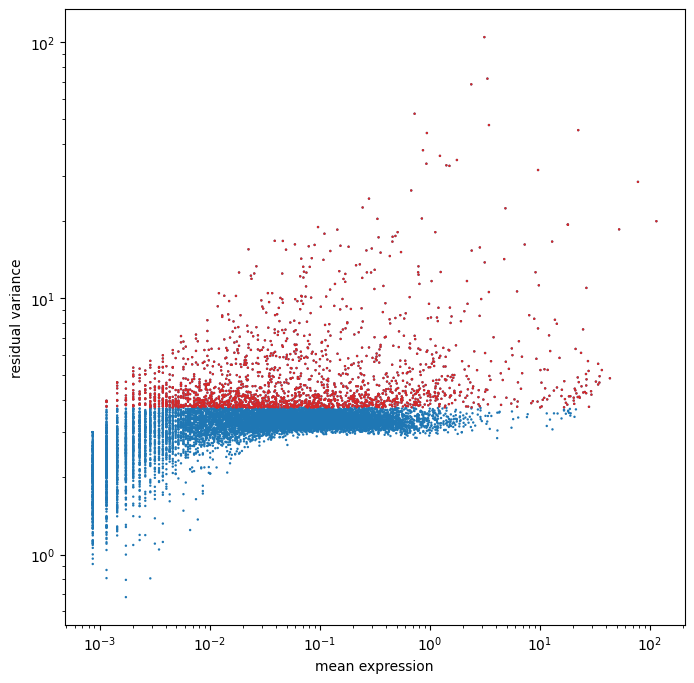

In [8]:
hvgs = adata.var["highly_variable"]

plt.figure(figsize=(8,8))
plt.scatter(adata.var["mean_counts"], adata.var["residual_variances"], s=3, edgecolor="none")
plt.scatter( 
        adata.var["mean_counts"][hvgs],
        adata.var["residual_variances"][hvgs],
        c="tab:red",
        label="selected genes",
        s=3,
        edgecolor="none",
)
plt.xscale('log')
plt.yscale('log')

plt.xlabel("mean expression")
plt.ylabel("residual variance")

plt.show()

In [9]:
sc.pp.scale(adata.X)

array([[-0.5184636 ,  2.2909377 , -0.5580691 , ..., -0.41930914,
        -0.03770151, -0.3058649 ],
       [-0.5184636 , -0.395306  , -0.5580691 , ...,  1.9659806 ,
        -0.03770151, -0.3058649 ],
       [ 3.6673417 , -0.395306  , -0.5580691 , ..., -0.41930914,
        -0.03770151, -0.3058649 ],
       ...,
       [ 0.37829363,  0.796618  ,  0.6509204 , ..., -0.41930914,
        -0.03770151,  0.42258236],
       [-0.5184636 , -0.395306  , -0.5580691 , ..., -0.41930914,
        -0.03770151, -0.3058649 ],
       [-0.5184636 ,  2.7531326 , -0.5580691 , ...,  2.2624946 ,
        -0.03770151, -0.3058649 ]], dtype=float32)

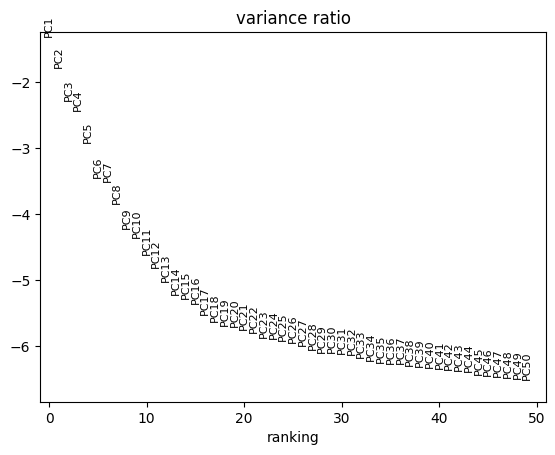

First 50 PCs explain 0.9084748029708862 of variance


In [10]:
X_pca = sc.pp.pca(adata, n_comps=50) 

sc.pl.pca_variance_ratio(adata, log=True, n_pcs = 50) 

print(f"First 50 PCs explain {np.sum(adata.uns['pca']['variance_ratio'][:50])} of variance")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


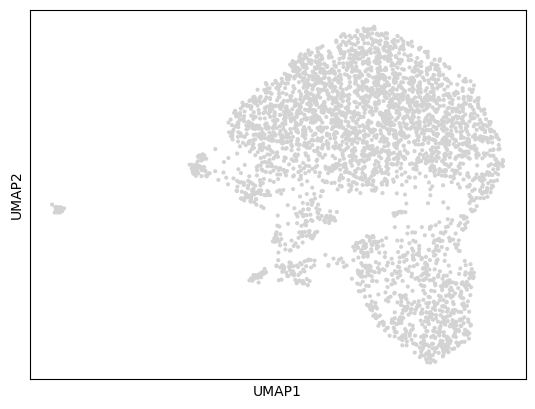

In [11]:
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=30)
sc.tl.umap(adata)
sc.pl.umap(adata)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


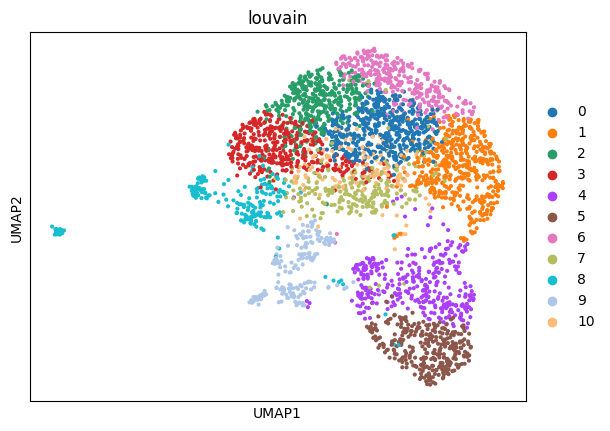

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


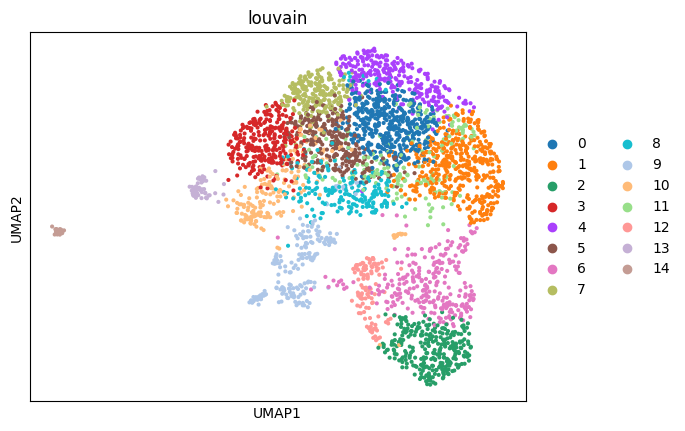

In [12]:
sc.pp.neighbors(adata, n_neighbors=50, n_pcs=30)

sc.tl.louvain(adata)

sc.pl.umap(adata, color=["louvain"], cmap="tab20")

sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)

sc.tl.louvain(adata)

sc.pl.umap(adata, color=["louvain"], cmap="tab20")

#6 clusters w 50 neighbors, 13 clusters w 5 neighbors

In [13]:
annotations = pd.read_csv("droplet/annotations_droplet.csv")

/var/folders/sm/phqgwmn54wg8myfr7vsq1vx80000gn/T/ipykernel_5348/4201581835.py:1: DtypeWarning: Columns (10,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  annotations = pd.read_csv("droplet/annotations_droplet.csv")


In [14]:
annotations['cell_id'] = annotations['cell'].str[-16:]
adata.obs['cell_id'] = adata.obs.index.str[:-2]

In [15]:
annotations = annotations[annotations['tissue']=="Spleen"]

In [16]:
annotations['cell_ontology_class'].unique()
# unique cell types in mammary gland

array(['B cell', 'natural killer cell', 'T cell', 'macrophage',
       'dendritic cell'], dtype=object)

In [17]:
annotations = annotations[['cell_id', 'cell_ontology_class']]
annotations = annotations[annotations['cell_id'].isin(adata.obs['cell_id'])]
annotations = annotations.drop_duplicates(subset=['cell_id'])

In [18]:
# Assuming you have a pandas DataFrame called 'annotations' with cell annotations
adata.obs = adata.obs.merge(annotations, on='cell_id', how='left')

In [19]:
import lsh
import importlib
importlib.reload(lsh)

<module 'lsh' from '/Users/koheisanno/Documents/School/COS521_Final/lsh.py'>

In [20]:
pca_data = adata.obsm['X_pca']

In [21]:
pca_data.shape

(3415, 50)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


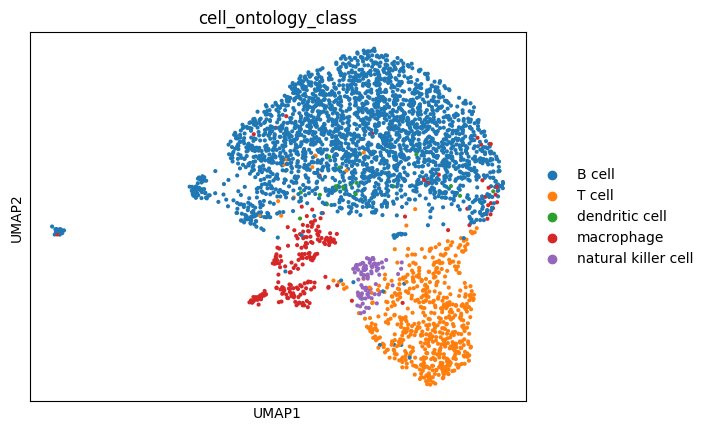

In [22]:
sc.pl.umap(adata, color=["cell_ontology_class"], cmap="tab20")

In [23]:
import lsh
import knn
import importlib
importlib.reload(lsh)
importlib.reload(knn)

<module 'knn' from '/Users/koheisanno/Documents/School/COS521_Final/knn.py'>

In [24]:
pca_data.shape

(3415, 50)

In [32]:
knn_lsh_8_260 = knn.KNN_LSH(pca_data.shape[1], 8, 260, 700, similarity_metric='jaccard')
knn_lsh_8_260.construct_knng(pca_data, 50)

constructing data structure
querying points...
computing jaccard similarity...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


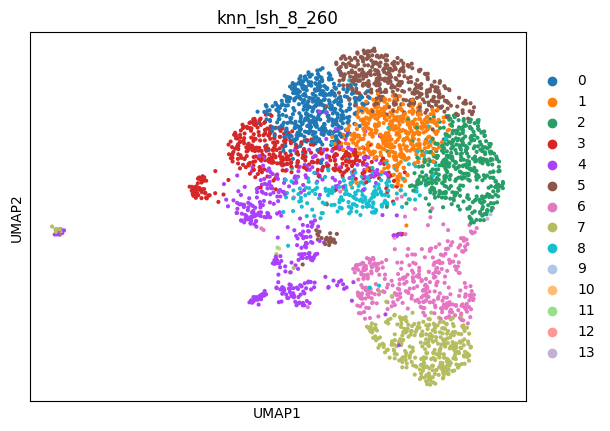

In [26]:
sc.tl.louvain(adata, adjacency=knn_lsh_8_260.sp_adj_matrix, key_added="knn_lsh_8_260")

sc.pl.umap(adata, color=["knn_lsh_8_260"], cmap="tab20")

In [33]:
knn_lsh_brute = knn.KNN_Brute(pca_data.shape[1], similarity_metric='jaccard')
knn_lsh_brute.construct_knng(pca_data, 50)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


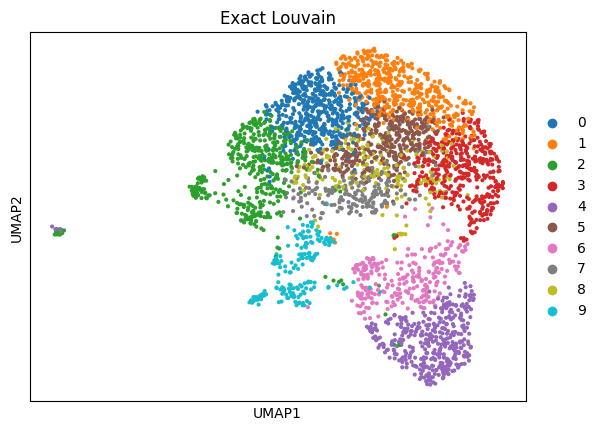

In [28]:
sc.tl.louvain(adata, adjacency=knn_lsh_brute.sp_adj_matrix, key_added="louvain_brute")

sc.pl.umap(adata, color=["louvain_brute"], cmap="tab20", title="Exact Louvain")